# Movie sentiment classifier

In [ ]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
#from keras.preprocessing import sequence
import numpy as np
from tensorflow.keras.preprocessing import sequence


In [10]:
np.random.seed(42)

In [15]:
top_words =5000
(X_train,y_train),(x_test,y_test)= imdb.load_data(num_words=top_words)

In [18]:
max_review_length= 500
X_train = sequence.pad_sequences(X_train,maxlen=max_review_length)
x_test = sequence.pad_sequences(x_test,maxlen=max_review_length)


In [27]:
embedding_vector_length= 35
model= Sequential()
model.add(Embedding(top_words,embedding_vector_length,input_length= max_review_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'] )
print(model.summary())
model.fit(X_train,y_train,validation_data=(x_test,y_test),epochs=3,batch_size=64)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 500, 35)           175000    
                                                                 
 lstm_3 (LSTM)               (None, 100)               54400     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 229,501
Trainable params: 229,501
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3
391/391 [==============================] - 379s 957ms/step - loss: 0.4555 - accuracy: 0.7774 - val_loss: 0.3100 - val_accuracy: 0.8727
Epoch 2/3
391/391 [==============================] - 267s 683ms/step - loss: 0.3130 - accuracy: 0.8719 - val_loss: 0.3421 - val_accuracy: 0.8602
Epoch 3/3
391/391

In [28]:
scores= model.evaluate(x_test,y_test,verbose=0)
print("accuracy:%.2f%%" %(scores[1]*100))

accuracy:87.18%


# latent semantics analysis using PCA

In [7]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np
newsgroups_train= fetch_20newsgroups(subset='train',categories=['alt.atheism','sci.space'])

In [16]:
import numpy as np
pipeline = Pipeline([('vect',CountVectorizer()),
                     ('tfidf',TfidfTransformer())])
x = pipeline.fit_transform(newsgroups_train.data).todense()
x=np.array(x)
pca=PCA(n_components=2).fit(x)
data2D= pca.transform(x)

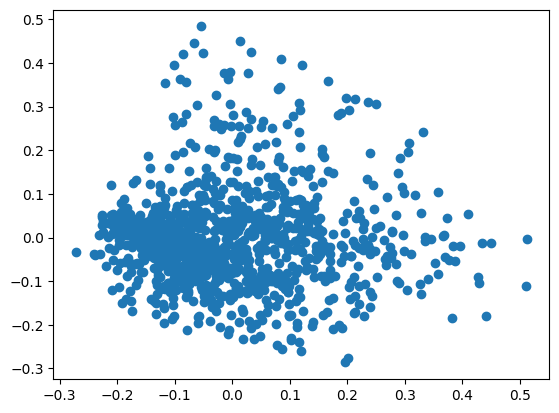

In [17]:
plt.scatter(data2D[:,0],data2D[:,1])
plt.show()

# singular value decomposition

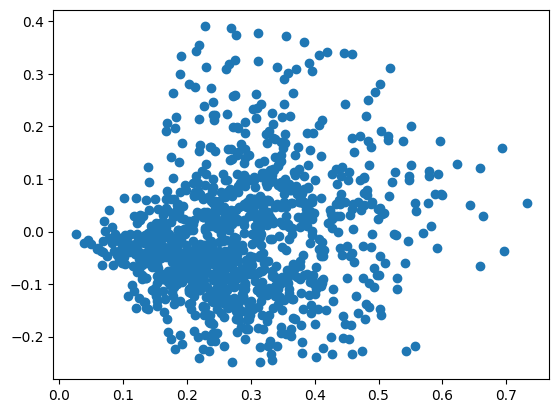

In [18]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np
newsgroups_train= fetch_20newsgroups(subset='train',categories=['alt.atheism','sci.space'])
import numpy as np
pipeline = Pipeline([('vect',CountVectorizer()),
                     ('tfidf',TfidfTransformer())])
x = pipeline.fit_transform(newsgroups_train.data).todense()
x=np.array(x)
svd=TruncatedSVD(n_components=2).fit(x)
data2D= svd.transform(x)
plt.scatter(data2D[:,0],data2D[:,1])
plt.show()